In [1]:
%matplotlib inline
import os
import sys

def add_path(path):
    if path not in sys.path:
        sys.path.insert(0, path)
        sys.path.append(path)
add_path('/home/jjian03/anaconda3/lib/python3.7/site-packages')
add_path(f'{os.path.abspath(os.path.join(".."))}')


In [2]:
import findspark

findspark.init('/opt/cloudera/parcels/SPARK2/lib/spark2/')
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as fn
from singleton_decorator import singleton


spark = SparkSession.builder. \
                config('spark.app.name', 'Jian Jian - Check data'). \
                config('spark.dynamicAllocation.enabled', 'true'). \
                config('spark.dynamicAllocation.maxExecutors', '50'). \
                config('spark.dynamicAllocation.executorIdleTimeout', '30s'). \
                config('spark.driver.maxResultSize', '8g'). \
                config('spark.driver.memory', '8g'). \
                config('spark.executor.memory', '8g'). \
                config('spark.task.maxFailures', '3'). \
                config('spark.yarn.am.memory', '8g'). \
                config('spark.yarn.max.executor.failures', '3'). \
                config('spark.kryoserializer.buffer.max', '1024m'). \
                config('spark.yarn.executor.memoryOverhead', '8g'). \
                getOrCreate()
sc = spark.sparkContext
spark_sql = SQLContext(sc)

In [3]:
def load_dataset(spark, path, name):
    spark.read.parquet(path).registerTempTable(name)
    
load_dataset(spark, '/user/jjian03/WebResourceQuality.parquet', 'web_resource_quality')
# load_dataset(spark, '/user/jjian03/WebResourceQuality_pmid.parquet', 'web_resource_quality_pmid')
# load_dataset(spark, '/datasets/MAG_20200403/MAG_Azure_Parquet/mag_parquet/Papers.parquet', 'Paper')
# load_dataset(spark, '/user/lliang06/icon/MAG_publication_features.parquet', 'mag')

In [4]:
seed = 77
fract = 0.03
# raw_data = spark_sql.sql(f'''
#                     SELECT wr.id
#                         , wr.url
#                         , wr.actual_scrape_url
#                         , wr.first_appear
#                         , wr.first_available_timestamp
#                         , wr.last_available_timestamp
#                         , wr.header
#                         , wr.html_text
#                         , wr.comment
#                         , wr.from_waybackmachine
#                         , wr.http_status_code
#                         , wr.original_check_failure
#                         , wr.original_check_error_log
#                         , wr.terminate_reason
#                         , wr.terminate_reason_error_log
    
#                         , m.paperId
#                         , m.total_num_of_paper_citing
#                         , m.total_num_of_author_citing
#                         , m.total_num_of_affiliation_citing
#                         , m.total_num_of_journal_citing
#                         , m.total_num_of_author_self_citation
#                         , m.total_num_of_affiliation_self_citation
#                         , m.total_num_of_journal_self_citation
#                         , m.avg_year
#                         , m.min_year
#                         , m.max_year
#                         , m.median
#                         , m.num_of_author
#                         , m.num_of_author_citing
#                         , m.num_of_affiliation_citing
#                         , m.num_of_journal_citing
#                         , m.avg_hindex
#                         , m.first_author_hindex
#                         , m.last_author_hindex
#                         , m.avg_mid_author_hindex
#                         , m.paper_unique_affiliation
    
#                     FROM web_resource_quality wr
#                     JOIN web_resource_quality_pmid wr_doi ON wr.id = wr_doi.id
#                     JOIN Paper p ON wr_doi.doi = p.doi
#                     JOIN mag m ON p.paperId = m.paperId
#                     WHERE wr.label IS NOT NULL
#                     AND wr.label IN ("0", "1")
#                     AND isNaN(wr.label) = false
#                     AND wr.first_appear IS NOT NULL
#                     AND isNaN(wr.first_appear) = false
#                     AND lower(wr.url) NOT LIKE "%doi.org%"
#                 ''') \
#                 .orderBy(fn.rand(seed=seed)) \
#                 .sample(False, fract, seed)


In [5]:
raw_data = spark_sql.sql(f'''
                    SELECT *
    
                    FROM web_resource_quality
                ''')
df = raw_data.select(['from_waybackmachine', 'label', 'last_available_timestamp']).toPandas()
df.loc[:, 'last_available_timestamp'] = df.last_available_timestamp.astype(str)



Text(0.5, 1, "Jian's Dataset")

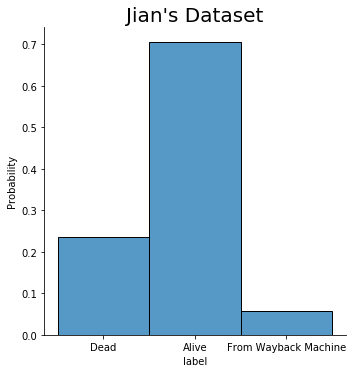

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


df.loc[:, 'label'] = df.label.map({
    -1: 'Dead',
    0: 'From Wayback Machine',
    1: 'Alive'
})
sns.displot(df, x='label', stat="probability")
plt.title('Jian\'s Dataset', fontsize=20)